# Clustering

- [Similarity scores in various biological data](#similarity-scores)
- Useful methods: Kmeans, hierarchical, spectral, DBSCAN
- Graph community detection: modularity, random walking, infomap

https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch11/ch11.ipynb

## Similarity scores

Clustering invokes the establishment of a metric space. The basic distances are available in scikit learn using the [DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) class.

Since biological data is so diverse, it is useful to go through several types:
- Real valued vector spaces (gene expression, most types of signal intensity values)
- 2D vector spaces (images, spatial transcriptomics)
- Integer valued vector spaces (sequence counts)
- Boolean values (on/off transcriptional activation, signal cutoffs)

Basically anything that can be measured is available as a metric and you can see the full list [here](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).
 

Task:
- compute one pairwise distance matrix from the gene expression data set available in data. Use pandas to store the expression matrix, apply a treshold on the similarity matrix.
- have a look at the following table detailing distances used by various clustering methods:
http://scikit-learn.org/stable/modules/clustering.html


## Kmeans

This algorithm is very intuitive, because it separates clusters based on local centroid distances. Importantly, it makes no effort in finding the optimal number of clusters, instead it fits clusters based on the number that you specify. This fit is an iterative process, in which the centroids are recomputed at every steps.

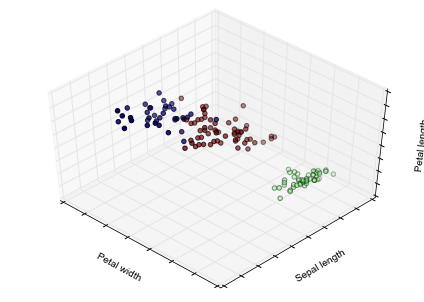

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

est = KMeans(n_clusters=3)
est.fit(X)
labels = est.labels_

# Plot the ground truth
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

Hierarchical Clustering will build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. We decide at what level of structured tree we are looking by specifying the desired number of clusters.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

model = hierarchical(n_clusters=3, linkage="average", affinity="euclidean")
model.fit(X)
labels = model.labels_

# Plot the ground truth
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

ImportError: cannot import name AgglomerativeClustering

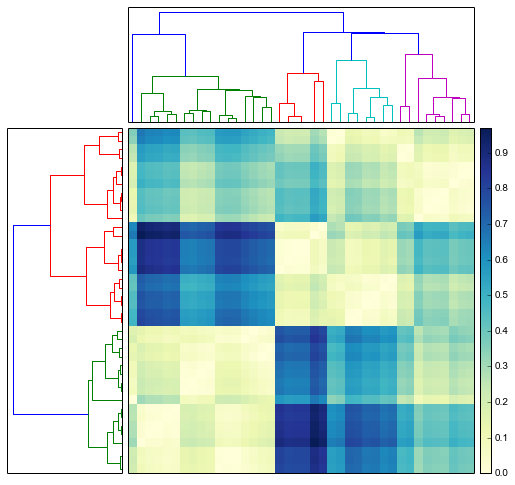

In [1]:
%matplotlib inline

import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate random features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
#fig.show()
fig.savefig('dendrogram.png')